<a href="https://colab.research.google.com/github/khushee-g/EEG/blob/main/Eyes_open_closed_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

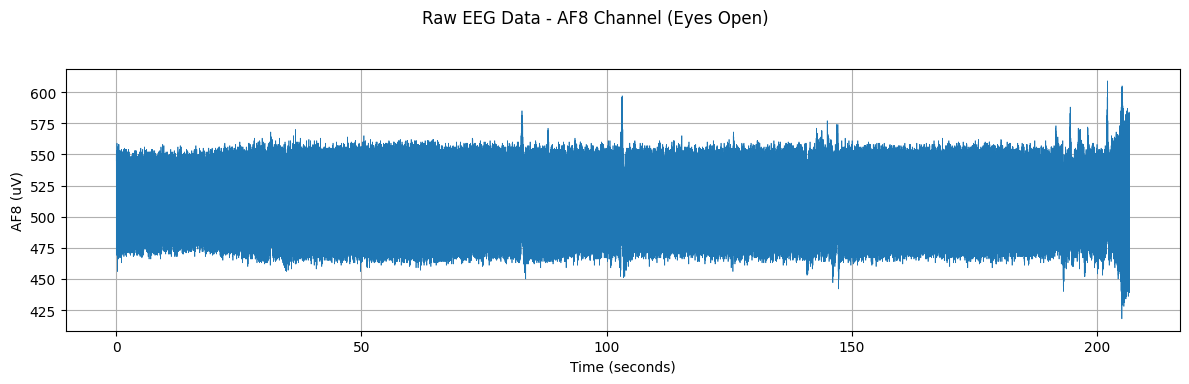

In [18]:

import numpy as np
import matplotlib.pyplot as plt

sampling_rate = 250  # Hz
duration = 10  # seconds
num_samples = sampling_rate * duration


eeg_data = np.loadtxt("/content/AF8_eyesOpen_serial_data.txt", delimiter=',', usecols=0)

num_samples = len(eeg_data)
duration = num_samples / sampling_rate


# Time vector
# Ensure the time vector matches the length of the actual data
time_vector = np.arange(0, duration, 1/sampling_rate)[:num_samples]


# Plotting the raw EEG data for a single channel
# Since eeg_data is 1D, we plot a single axis.
fig, ax = plt.subplots(1, 1, figsize=(12, 4)) # Create a single subplot

fig.suptitle('Raw EEG Data - AF8 Channel (Eyes Open)')

# Plotting the single channel data
ax.plot(time_vector, eeg_data, lw=0.5) # Plot the 1D data directly
ax.set_ylabel('AF8 (uV)') # Set label for the single channel
ax.grid(True)

ax.set_xlabel('Time (seconds)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()

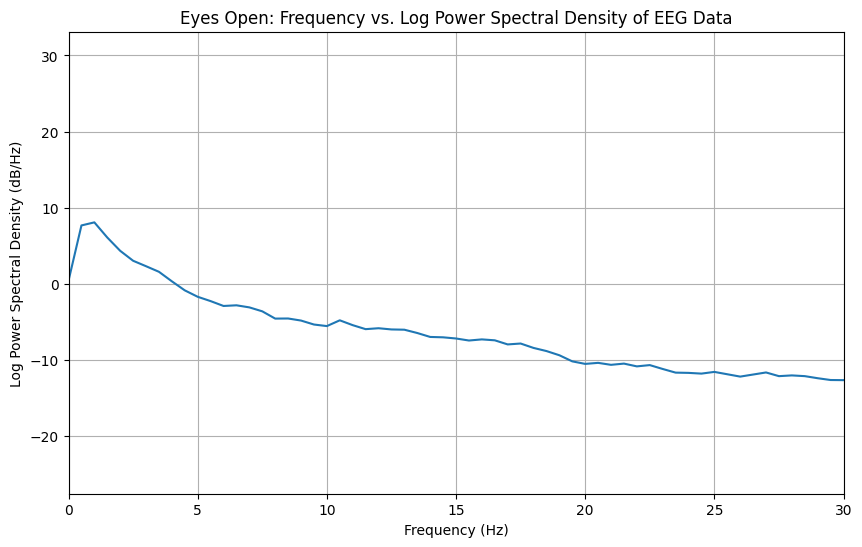

In [16]:
# prompt: take this Electroenchaephagraphy data and make a plot of frequency v.s. log power spectral density

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Assume 'eeg_data' is your raw EEG data (a 1D NumPy array)
# Replace this with your actual EEG data
# For demonstration, let's create some dummy data
sampling_frequency = 250  # Hz (replace with your actual sampling frequency)
duration = 10  # seconds
t = np.linspace(0, duration, int(sampling_frequency * duration), endpoint=False)
eeg_data = np.sin(2 * np.pi * 10 * t) + 0.5 * np.sin(2 * np.pi * 25 * t) + np.random.randn(len(t)) * 0.2

# --- Processing Steps ---

# Compute the Power Spectral Density (PSD) using Welch's method
# 'fs' is the sampling frequency
# 'nperseg' is the length of each segment for Welch's method. A common choice is 2*fs.
# Adjust this based on your data characteristics and desired frequency resolution.
frequencies, psd = welch(eeg_data, fs=sampling_frequency, nperseg=2 * sampling_frequency)

# Convert PSD to log power spectral density (using log10)
log_psd = 10 * np.log10(psd)

# --- Plotting ---

plt.figure(figsize=(10, 6))
plt.plot(frequencies, log_psd)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Log Power Spectral Density (dB/Hz)")
plt.title("Frequency vs. Log Power Spectral Density of EEG Data")
plt.grid(True)
plt.xlim([0, sampling_frequency / 2]) # Limit x-axis to Nyquist frequency
plt.show()


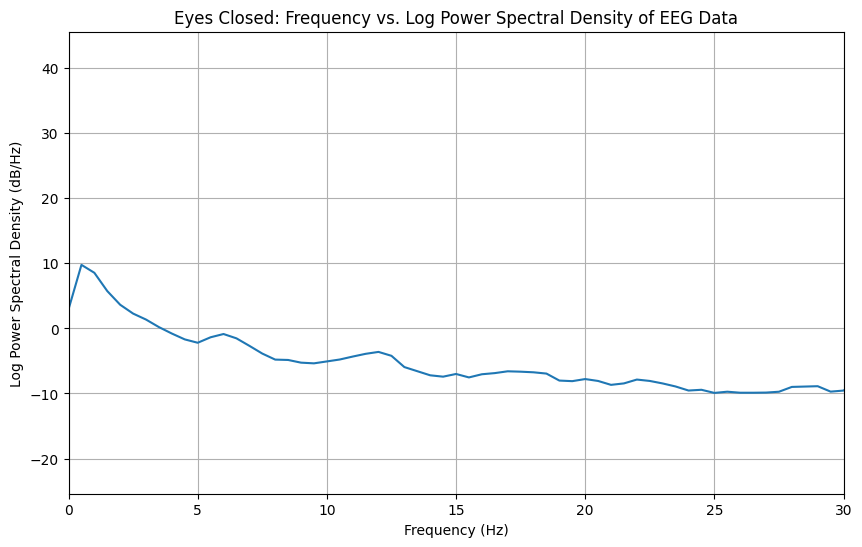

In [17]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch


sampling_frequency = 250
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch


sampling_frequency = 250
duration = 120  # seconds
t = np.linspace(0, duration, int(sampling_frequency * duration), endpoint=False)
eeg_data = np.loadtxt("/content/AF8_eyesClosed_serial_data.txt", delimiter=',', usecols=0)

frequencies, psd = welch(eeg_data, fs=sampling_frequency, nperseg=2 * sampling_frequency)

log_psd = 10 * np.log10(psd)

# --- Plotting ---

plt.figure(figsize=(10, 6))
plt.plot(frequencies, log_psd)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Log Power Spectral Density (dB/Hz)")
plt.title("Eyes Closed: Frequency vs. Log Power Spectral Density of EEG Data")
plt.grid(True)
plt.xlim([0, 30])
plt.show()


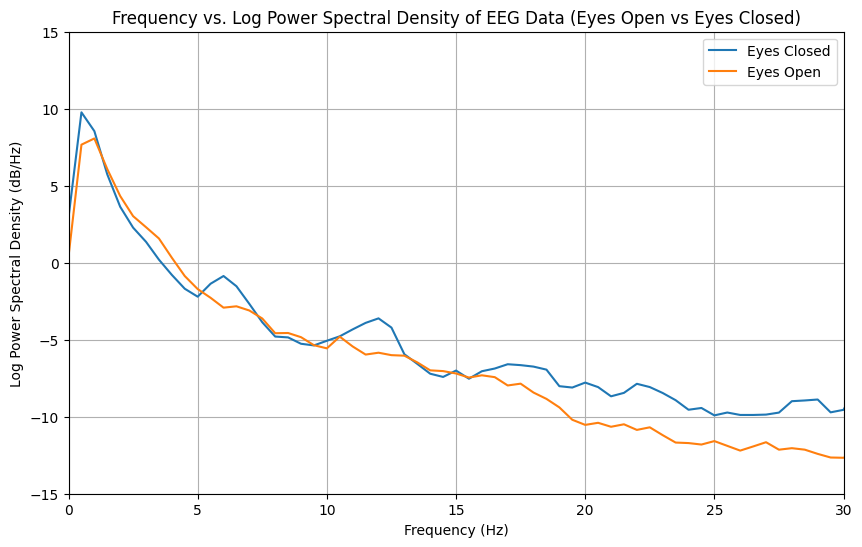

In [24]:
# prompt: plot the last two graphs on the same plot

import matplotlib.pyplot as plt
import numpy as np
# Combine the last two plots
plt.figure(figsize=(10, 6))
plt.plot(frequencies, log_psd, label='Eyes Closed')

# Recompute PSD for the eyes open data
eeg_data_eyes_open = np.loadtxt("/content/AF8_eyesOpen_serial_data.txt", delimiter=',', usecols=0)
frequencies_open, psd_open = welch(eeg_data_eyes_open, fs=sampling_frequency, nperseg=2 * sampling_frequency)
log_psd_open = 10 * np.log10(psd_open)
plt.plot(frequencies_open, log_psd_open, label='Eyes Open')

plt.xlabel("Frequency (Hz)")
plt.ylabel("Log Power Spectral Density (dB/Hz)")
plt.title("Frequency vs. Log Power Spectral Density of EEG Data (Eyes Open vs Eyes Closed)")
plt.grid(True)
plt.xlim([0, 30])
plt.ylim([-15, 15])
plt.legend()
plt.show()